In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SparkMLLib").enableHiveSupport().getOrCreate()

# Tạo Dataframe từ file csv

In [2]:
data = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("Data-DLL.csv")

In [3]:
data.cache()

DataFrame[RDA: string, DistrictID: int, District: string, Year: int, ReportType: string, Akm: double, Bkm: double, Ckm: double, Dkm: double, Ekm: double, Fkm: double, Totalkm: double, Apc: double, Bpc: double, Cpc: double, Dpc: double, Epc: double, Fpc: double, GOODpc: double, FAIRpc: double, POORpc: double, BADpc: double, Highpc: double]

In [4]:
data.count()

15375

In [5]:
len(data.columns)

23

In [6]:
display(data)

DataFrame[RDA: string, DistrictID: int, District: string, Year: int, ReportType: string, Akm: double, Bkm: double, Ckm: double, Dkm: double, Ekm: double, Fkm: double, Totalkm: double, Apc: double, Bpc: double, Cpc: double, Dpc: double, Epc: double, Fpc: double, GOODpc: double, FAIRpc: double, POORpc: double, BADpc: double, Highpc: double]

# Hiển thị nội dung của Dataframe

In [7]:
data.show()

+---------------+----------+--------+----+----------+----+----+----+----+-----+----+-------+----+----+----+----+----+----+------+------+------+-----+------+
|            RDA|DistrictID|District|Year|ReportType| Akm| Bkm| Ckm| Dkm|  Ekm| Fkm|Totalkm| Apc| Bpc| Cpc| Dpc| Epc| Fpc|GOODpc|FAIRpc|POORpc|BADpc|Highpc|
+---------------+----------+--------+----+----------+----+----+----+----+-----+----+-------+----+----+----+----+----+----+------+------+------+-----+------+
|East of England|        41| Babergh|1990|   biology|26.8|54.0|31.6| 0.0|  0.0| 0.0|  112.5|23.8|48.0|28.1| 0.0| 0.0| 0.0|  71.9|  28.1|   0.0|  0.0|  null|
|East of England|        41| Babergh|1990| chemistry| 0.0|15.9|95.1|34.0|  3.2| 0.0|  148.2| 0.0|10.7|64.2|22.9| 2.1| 0.0|  10.7|  87.1|   2.1|  0.0|  null|
|East of England|        41| Babergh|1990|   nitrate| 0.0| 0.0| 5.7|65.6| 42.4|34.5|  148.2| 0.0| 0.0| 3.9|44.3|28.6|23.3|  null|  null|  null| null|  51.9|
|East of England|        41| Babergh|1990| phosphate| 0.0|

# In ra cấu trúc của Dataframe theo dạng cây

In [8]:
data.printSchema()

root
 |-- RDA: string (nullable = true)
 |-- DistrictID: integer (nullable = true)
 |-- District: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- ReportType: string (nullable = true)
 |-- Akm: double (nullable = true)
 |-- Bkm: double (nullable = true)
 |-- Ckm: double (nullable = true)
 |-- Dkm: double (nullable = true)
 |-- Ekm: double (nullable = true)
 |-- Fkm: double (nullable = true)
 |-- Totalkm: double (nullable = true)
 |-- Apc: double (nullable = true)
 |-- Bpc: double (nullable = true)
 |-- Cpc: double (nullable = true)
 |-- Dpc: double (nullable = true)
 |-- Epc: double (nullable = true)
 |-- Fpc: double (nullable = true)
 |-- GOODpc: double (nullable = true)
 |-- FAIRpc: double (nullable = true)
 |-- POORpc: double (nullable = true)
 |-- BADpc: double (nullable = true)
 |-- Highpc: double (nullable = true)



In [9]:
data

DataFrame[RDA: string, DistrictID: int, District: string, Year: int, ReportType: string, Akm: double, Bkm: double, Ckm: double, Dkm: double, Ekm: double, Fkm: double, Totalkm: double, Apc: double, Bpc: double, Cpc: double, Dpc: double, Epc: double, Fpc: double, GOODpc: double, FAIRpc: double, POORpc: double, BADpc: double, Highpc: double]

# Đếm số data null của từng cột

In [10]:
dataset=data.rdd.flatMap(lambda r: r.asDict().items())

In [11]:
dataset.filter(lambda kv: kv[1] is None).mapValues(lambda x: 1).reduceByKey(lambda x,y: x+y).collect()

[('Highpc', 8909),
 ('GOODpc', 6991),
 ('FAIRpc', 6991),
 ('POORpc', 6991),
 ('BADpc', 6991),
 ('Apc', 525),
 ('Bpc', 525),
 ('Cpc', 525),
 ('Dpc', 525),
 ('Epc', 525),
 ('Fpc', 525)]

# Delete cột District

In [12]:
columns_to_drop = ["District"]

dataset = data.drop(*columns_to_drop)

In [13]:
dataset.printSchema()

root
 |-- RDA: string (nullable = true)
 |-- DistrictID: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- ReportType: string (nullable = true)
 |-- Akm: double (nullable = true)
 |-- Bkm: double (nullable = true)
 |-- Ckm: double (nullable = true)
 |-- Dkm: double (nullable = true)
 |-- Ekm: double (nullable = true)
 |-- Fkm: double (nullable = true)
 |-- Totalkm: double (nullable = true)
 |-- Apc: double (nullable = true)
 |-- Bpc: double (nullable = true)
 |-- Cpc: double (nullable = true)
 |-- Dpc: double (nullable = true)
 |-- Epc: double (nullable = true)
 |-- Fpc: double (nullable = true)
 |-- GOODpc: double (nullable = true)
 |-- FAIRpc: double (nullable = true)
 |-- POORpc: double (nullable = true)
 |-- BADpc: double (nullable = true)
 |-- Highpc: double (nullable = true)



# Delete dữ liệu null

In [14]:
dataset1=dataset.dropna(thresh=12)

In [15]:
dataset1.count()

14850

In [16]:
len(dataset1.columns)

22

Sau khi delete dữ liệu còn lại 14850 dòng và 22 cột

In [17]:
columns_to_drop = ["RDA", "DistrictID", "Year", "ReportType", "Akm", "Bkm", "Ckm", "Dkm", "Ekm", "Fkm", "Totalkm", "Apc", "Bpc", "Cpc", "Dpc", "Epc", "Fpc" ]

dataset2 = dataset1.drop(*columns_to_drop)

In [18]:
dataset2.show()

+------+------+------+-----+------+
|GOODpc|FAIRpc|POORpc|BADpc|Highpc|
+------+------+------+-----+------+
|  71.9|  28.1|   0.0|  0.0|  null|
|  10.7|  87.1|   2.1|  0.0|  null|
|  null|  null|  null| null|  51.9|
|  null|  null|  null| null|  97.9|
|  14.6|  84.6|   0.8|  0.0|  null|
|  39.5|  60.5|   0.0|  0.0|  null|
|  84.3|  15.7|   0.0|  0.0|  null|
|  46.4|  48.6|   5.1|  0.0|  null|
|  null|  null|  null| null|  86.1|
|  null|  null|  null| null|  86.3|
|  26.8|  68.1|   5.1|  0.0|  null|
|   7.7|  71.5|  20.8|  0.0|  null|
|  12.8|  66.7|  20.5|  0.0|  null|
|  21.3|  64.9|  13.8|  0.0|  null|
|  91.9|   8.1|   0.0|  0.0|  null|
|  67.2|  26.6|   6.2|  0.0|  null|
|  null|  null|  null| null| 100.0|
|  null|  null|  null| null|  89.1|
|  83.4|  16.6|   0.0|  0.0|  null|
|  null|  null|  null| null|  91.2|
+------+------+------+-----+------+
only showing top 20 rows



Tính trung bình cho những dữ liệu bị thiếu

In [19]:
mean_dict = { col: 'mean' for col in dataset2.columns }
col_avgs = dataset1.agg( mean_dict ).collect()[0].asDict()
col_avgs = { k[4:-1]: v for k,v in col_avgs.items() }
data1=dataset1.fillna( col_avgs )

In [20]:
data1.show()

+---------------+----------+----+----------+----+----+----+----+-----+----+-------+----+----+----+----+----+----+-----------------+-----------------+-----------------+------------------+------------------+
|            RDA|DistrictID|Year|ReportType| Akm| Bkm| Ckm| Dkm|  Ekm| Fkm|Totalkm| Apc| Bpc| Cpc| Dpc| Epc| Fpc|           GOODpc|           FAIRpc|           POORpc|             BADpc|            Highpc|
+---------------+----------+----+----------+----+----+----+----+-----+----+-------+----+----+----+----+----+----+-----------------+-----------------+-----------------+------------------+------------------+
|East of England|        41|1990|   biology|26.8|54.0|31.6| 0.0|  0.0| 0.0|  112.5|23.8|48.0|28.1| 0.0| 0.0| 0.0|             71.9|             28.1|              0.0|               0.0|50.631819262621775|
|East of England|        41|1990| chemistry| 0.0|15.9|95.1|34.0|  3.2| 0.0|  148.2| 0.0|10.7|64.2|22.9| 2.1| 0.0|             10.7|             87.1|              2.1|         

In [21]:
from pyspark.sql import Row

# Đếm số lượng của từng loại đánh giá

In [22]:
def df_value_counts(df, col):
    return df.rdd.map(lambda row: (row[col], 1)).reduceByKey(lambda x,y: x+y).sortBy(lambda x: -x[1]).collect()

In [23]:
df_value_counts(data1, 'ReportType')

[('chemistry', 5485),
 ('phosphate', 3274),
 ('nitrate', 3192),
 ('biology', 2899)]

# Định nghĩa giá trị loại đánh giá

In [24]:
def replace_row(row, repdict):
    d = row.asDict()
    for k, torep in repdict.items():
        if k in d:
            d[k] = torep[d[k]]
    return Row(**d)

def df_replace(df, repdict):
    return df.rdd.map(lambda r: replace_row(r, repdict))

In [25]:
data1 = df_replace(data1, { 'ReportType': {'chemistry':3,'nitrate':2,'phosphate':1,'biology':0}})

In [26]:
data1 = data1.toDF()

# Dữ liệu cuối cùng sau khi tiền xử lý

In [27]:
data1.show()

+----+----+------------------+----+----+----+----+----------+----+----+-----+----+-----------------+----+----+-----------------+------------------+-----------------+---------------+----------+-------+----+
| Akm| Apc|             BADpc| Bkm| Bpc| Ckm| Cpc|DistrictID| Dkm| Dpc|  Ekm| Epc|           FAIRpc| Fkm| Fpc|           GOODpc|            Highpc|           POORpc|            RDA|ReportType|Totalkm|Year|
+----+----+------------------+----+----+----+----+----------+----+----+-----+----+-----------------+----+----+-----------------+------------------+-----------------+---------------+----------+-------+----+
|26.8|23.8|               0.0|54.0|48.0|31.6|28.1|        41| 0.0| 0.0|  0.0| 0.0|             28.1| 0.0| 0.0|             71.9|50.631819262621775|              0.0|East of England|         0|  112.5|1990|
| 0.0| 0.0|               0.0|15.9|10.7|95.1|64.2|        41|34.0|22.9|  3.2| 2.1|             87.1| 0.0| 0.0|             10.7|50.631819262621775|              2.1|East of Eng

In [28]:
data1.printSchema()

root
 |-- Akm: double (nullable = true)
 |-- Apc: double (nullable = true)
 |-- BADpc: double (nullable = true)
 |-- Bkm: double (nullable = true)
 |-- Bpc: double (nullable = true)
 |-- Ckm: double (nullable = true)
 |-- Cpc: double (nullable = true)
 |-- DistrictID: long (nullable = true)
 |-- Dkm: double (nullable = true)
 |-- Dpc: double (nullable = true)
 |-- Ekm: double (nullable = true)
 |-- Epc: double (nullable = true)
 |-- FAIRpc: double (nullable = true)
 |-- Fkm: double (nullable = true)
 |-- Fpc: double (nullable = true)
 |-- GOODpc: double (nullable = true)
 |-- Highpc: double (nullable = true)
 |-- POORpc: double (nullable = true)
 |-- RDA: string (nullable = true)
 |-- ReportType: long (nullable = true)
 |-- Totalkm: double (nullable = true)
 |-- Year: long (nullable = true)



In [29]:
len(data1.columns)

22

In [30]:
data1.count()

14850

In [31]:
#data1.write.csv('tienxuly.csv')

In [32]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
#Dùng để đưa danh sách các cột vào thành một vector

In [33]:
vector_assembler = VectorAssembler(\
inputCols=["Totalkm", "GOODpc", "FAIRpc", "POORpc", "BADpc", "Highpc"],\
outputCol="features")
df_temp = vector_assembler.transform(data1)
df_temp.show()

+----+----+------------------+----+----+----+----+----------+----+----+-----+----+-----------------+----+----+-----------------+------------------+-----------------+---------------+----------+-------+----+--------------------+
| Akm| Apc|             BADpc| Bkm| Bpc| Ckm| Cpc|DistrictID| Dkm| Dpc|  Ekm| Epc|           FAIRpc| Fkm| Fpc|           GOODpc|            Highpc|           POORpc|            RDA|ReportType|Totalkm|Year|            features|
+----+----+------------------+----+----+----+----+----------+----+----+-----+----+-----------------+----+----+-----------------+------------------+-----------------+---------------+----------+-------+----+--------------------+
|26.8|23.8|               0.0|54.0|48.0|31.6|28.1|        41| 0.0| 0.0|  0.0| 0.0|             28.1| 0.0| 0.0|             71.9|50.631819262621775|              0.0|East of England|         0|  112.5|1990|[112.5,71.9,28.1,...|
| 0.0| 0.0|               0.0|15.9|10.7|95.1|64.2|        41|34.0|22.9|  3.2| 2.1|          

In [34]:
from pyspark.sql.functions import col
data1=df_temp.select("features", col("ReportType").alias("label"))
data1.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[112.5,71.9,28.1,...|    0|
|[148.2,10.7,87.1,...|    3|
|[148.2,48.3162541...|    2|
|[148.2,48.3162541...|    1|
|[148.2,14.6,84.6,...|    3|
|[148.2,39.5,60.5,...|    3|
|[144.4,84.3,15.7,...|    0|
|[148.2,46.4,48.6,...|    3|
|[148.2,48.3162541...|    2|
|[148.2,48.3162541...|    1|
|[148.2,26.8,68.1,...|    3|
|[148.2,7.7,71.5,2...|    3|
|[148.2,12.8,66.7,...|    3|
|[148.2,21.3,64.9,...|    3|
|[141.3,91.9,8.1,0...|    0|
|[148.2,67.2,26.6,...|    3|
|[148.2,48.3162541...|    2|
|[148.2,48.3162541...|    1|
|[148.2,83.4,16.6,...|    3|
|[148.2,48.3162541...|    2|
+--------------------+-----+
only showing top 20 rows



# Chia dữ liệu thành 70% cho tập train và 30% cho tập set

In [35]:
(trainingData, testData) = data1.randomSplit([0.7, 0.3])

In [36]:
from pyspark.ml.classification import DecisionTreeClassifier
#Dùng để tính toán và xây dựng cây quyết định
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#Dùng để đánh giá kết quả dự đoán của thuật toán

In [37]:
#Huấn luyện mô hình
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
model = dt.fit(trainingData)

In [38]:
#Dự đoán mô hình với tập test
predictions = model.transform(testData)

In [39]:
predictions.select("prediction", "label").show()

+----------+-----+
|prediction|label|
+----------+-----+
|       2.0|    2|
|       3.0|    3|
|       3.0|    3|
|       3.0|    3|
|       3.0|    3|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       1.0|    2|
|       3.0|    0|
|       3.0|    0|
|       3.0|    3|
|       3.0|    0|
|       3.0|    0|
|       0.0|    3|
|       3.0|    0|
|       3.0|    3|
|       3.0|    3|
|       3.0|    3|
+----------+-----+
only showing top 20 rows



In [40]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

Mô hình dự đoán kết quả của tập test với độ chính xác xấp xỉ = 68%

In [41]:
accuracy

0.6829938200961319

In [42]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator.evaluate(predictions)

Ta có chỉ số đánh giá f1-score(harmonic mean) xấp xỉ 61%

In [43]:
f1

0.6090440216476881

In [44]:
print(model)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_318abe40583d) of depth 5 with 39 nodes


In [45]:
print(model.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_318abe40583d) of depth 5 with 39 nodes
  If (feature 4 <= 1.7334023606120588)
   If (feature 3 <= 1.9197625774999998)
    If (feature 4 <= 0.101533381)
     If (feature 3 <= 0.19523883)
      If (feature 3 <= 0.1259458845)
       Predict: 3.0
      Else (feature 3 > 0.1259458845)
       Predict: 0.0
     Else (feature 3 > 0.19523883)
      If (feature 0 <= 16.55)
       Predict: 0.0
      Else (feature 0 > 16.55)
       Predict: 3.0
    Else (feature 4 > 0.101533381)
     If (feature 0 <= 233.60000000000002)
      Predict: 3.0
     Else (feature 0 > 233.60000000000002)
      If (feature 1 <= 68.583494505)
       Predict: 0.0
      Else (feature 1 > 68.583494505)
       Predict: 3.0
   Else (feature 3 > 1.9197625774999998)
    Predict: 3.0
  Else (feature 4 > 1.7334023606120588)
   If (feature 4 <= 1.7724134186120588)
    If (feature 5 <= 64.50996456)
     If (feature 5 <= 8.05)
      Predict: 2.0
     Else (feature 5 > 8.05)
 

In [46]:
from pyspark.ml.classification import RandomForestClassifier
#Dùng để tính toán và xây dựng mô hình rừng ngẫu nhiên

In [47]:
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=20)

In [48]:
model = rf.fit(trainingData)

In [49]:
predictions = model.transform(testData)

In [50]:
predictions.select('prediction', 'label').show()

+----------+-----+
|prediction|label|
+----------+-----+
|       2.0|    2|
|       3.0|    3|
|       3.0|    3|
|       3.0|    3|
|       3.0|    3|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       1.0|    1|
|       1.0|    2|
|       3.0|    0|
|       3.0|    0|
|       3.0|    3|
|       3.0|    0|
|       3.0|    0|
|       0.0|    3|
|       3.0|    0|
|       3.0|    3|
|       3.0|    3|
|       3.0|    3|
+----------+-----+
only showing top 20 rows



In [51]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy1 = evaluator.evaluate(predictions)

In [52]:
accuracy1

0.6770428015564203

In [53]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1")
f1_1 = evaluator.evaluate(predictions)

In [54]:
f1_1

0.600654935966123

In [55]:
print(model)

RandomForestClassificationModel (uid=RandomForestClassifier_a216485868bb) with 20 trees


In [56]:
from pyspark.ml.classification import NaiveBayes
#Dùng để tính toán và kiểm tra độ chính xác của kết quả dự đoán
nb = NaiveBayes(labelCol="label",\
featuresCol="features", smoothing=1.0,\
modelType="multinomial")
model = nb.fit(trainingData)

In [57]:
predictions = model.transform(testData)
predictions.select("label",
"probability", "prediction").show()

+-----+--------------------+----------+
|label|         probability|prediction|
+-----+--------------------+----------+
|    2|[0.00922814469355...|       2.0|
|    3|[0.00748467753067...|       1.0|
|    3|[0.00748467753067...|       1.0|
|    3|[0.00748467753067...|       1.0|
|    3|[0.00748467753067...|       1.0|
|    1|[1.10856873017022...|       1.0|
|    1|[1.10856873017022...|       1.0|
|    1|[1.10856873017022...|       1.0|
|    1|[1.10856873017022...|       1.0|
|    2|[1.10856873017022...|       1.0|
|    0|[0.89153604247168...|       0.0|
|    0|[0.89153604247168...|       0.0|
|    3|[0.89153604247168...|       0.0|
|    0|[0.00750087800264...|       1.0|
|    0|[0.00750087800264...|       1.0|
|    3|[0.99999999999999...|       0.0|
|    0|[0.00753425633829...|       1.0|
|    3|[0.00753425633829...|       1.0|
|    3|[0.00753425633829...|       1.0|
|    3|[0.00753425633829...|       1.0|
+-----+--------------------+----------+
only showing top 20 rows



In [58]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy2 = evaluator.evaluate(predictions)

In [59]:
accuracy2

0.42320897230487525

In [60]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1")
f1_2 = evaluator.evaluate(predictions)

In [61]:
f1_2

0.4057090887139109

# Biểu đồ so sánh độ chính xác của các thuật toán

<BarContainer object of 3 artists>

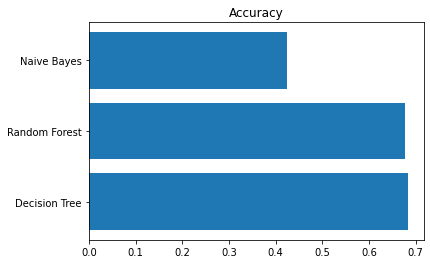

In [62]:
import matplotlib.pyplot as plt
plt.subplot()
plt.title('Accuracy')
names=['Decision Tree', 'Random Forest', 'Naive Bayes']
plt.barh(names, [accuracy, accuracy1, accuracy2])

<BarContainer object of 3 artists>

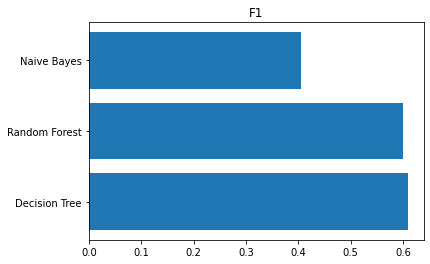

In [63]:
plt.subplot()
plt.title('F1')
names=['Decision Tree', 'Random Forest', 'Naive Bayes']
plt.barh(names, [f1, f1_1, f1_2])